In [1]:
import numpy as np
import math, random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [10]:
# ---- Step 1: define the model ----

# Define single neuron function
def single_neuron_classification_model(w, w_0, x):
    '''
    Creation of a single neuron regression model. This function calculates the 'z' output vector
    and returns the result of the activation function (a) over this vector. w and x must be same length
    
    Parameters
    ----------
    variable  | type  | 
    w           var.
    w_0         float
    x           var.
    '''
    
    # Perform the dot product on the input x and the learned weights w (z output vector)
    z = 0
    
    # loop over each feature and weight in x and w vector
    # zip function generates a tuple for each x,w pair.
    for feature, weight in zip(x, w):
        
        # z is the sum of all feature * weight
        z += feature * weight
    
    #Add the bias term
    z += w_0  
    
    # Apply the activation function, and return
    # This is the only change compare witht he regression, as now we need a sigmoid function activation.
    a = sigmoid(z)
    return a

# Sigmoid function to activate the classification reg model. Transform a real value between 0 and 1
def sigmoid(z):
    # Avoid division by 0
    non_zero_tolerance = 1e-8 
    sigmoid_f = 1 / (1 + math.exp(-z) + non_zero_tolerance)
    return sigmoid_f


# Test model output for a single 2D datapoint:
x = [1, 2]
w = [5, 3]
w_0 = -8

# predict y_value
# y follows the function: x_1 * w_1 + x_2 * w_2 + w_0
y = single_neuron_regression_model(w, w_0, x) 

# print result
print("input", x, "=> output", y)

input [1, 2] => output 0.9525741177484588


In [5]:
# The training process uses a negative log likelihood (NLL) loss function instead of the Square error
def train_model_NLL_loss(m_function, w, w_0, i_data, o_data, learning_rate, num_epochs):
    non_zero_tolerance = 1e-8
    
    # iterate over each epoch
    for epoch in range(num_epochs):
        total_loss = 0
        
        for x, y in zip(i_data, o_data):
            
            # predict y value for each observation
            y_predicted = m_function(w, w_0, x)
            
            # negative log likelihood loss function
            nll_loss = -(y * math.log(y_predicted + non_zero_tolerance) + (1-y) * \
                         math.log(1-y_predicted + non_zero_tolerance))
            
            # Calculate error
            error = y_predicted - y
            
            total_loss += nll_loss
            
            # update bias coefficient
            w_0 -= learning_rate * error * 1
            
            # update all coefficients
            for j, x_j in enumerate(x):
                
                w[j] -= learning_rate * error * x_j
            
        report_every = max(1, num_epochs // 10)
        if epoch % report_every == 0: #every few epochs, report on progress
            print("epoch", epoch, "has total loss", total_loss)
           
    return w, w_0

In [7]:
# Function to evaluate the accuracy of the model
def evaluate_classification_accuracy(m_function, w, w_0, i_data, o_data):
    correct = 0
    n = len(i_data)
    
    for x, y in zip(i_data, o_data):
        
        # Calculate the y value
        y_predicted = m_function(w, w_0, x)
        
        # Define label predicted as 1 if y_pred >0.5, 0 else
        label_predicted = 1 if y_predicted > 0.5 else 0
        
        # Evalaute if the prediction was correct or not
        if label_predicted == y:
            correct += 1
        else:
            print("Misclassify", x, y, "with activation", y_predicted)
    
    # Calculate accuracy as the number of corrects over the total data
    accuracy = correct / n
    print("Our model predicted", correct, "out of", n, 
          "correctly for", accuracy*100, "% accuracy")
    return accuracy

        

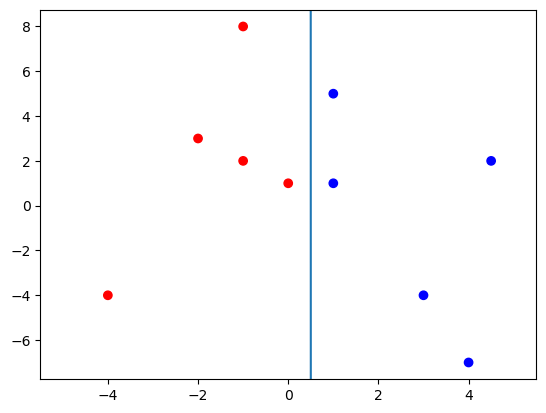

In [8]:
# Here we have a dataset of 2D linearly separable datapoints
input_data = [[1, 1],
              [1, 5],
              [-2, 3],
              [3, -4],
              [4.5, 2],
              [0, 1],
              [-4, -4],
              [-1, 2],
              [4, -7],
              [-1, 8]]
# And their corresponding labels
labels = [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]

# This utility function will allow us to visualize a given 2D dataset.
# You don't need to understand this code right now.
def plot_dataset_2D(x, y):
    x_np = np.array(x)
    x_np.reshape(len(x), 2)
    colors = []
    for label in y:
        if label == 0:
            colors.append("red")
        else:
            colors.append("blue")
    plt.scatter(x_np[...,0], x_np[...,1], color=colors)

# This utility function will allow us to visualize a 2D decision boundary
def plot_decision_boundary_2D(w, w_0):
    ylim = plt.ylim()
    x1 = np.arange(-5,6)
    plt.plot(x1, (-w_0 - w[0]*x1)/w[1])
    plt.ylim(ylim)
    
# Visualize the above dataset
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D([1, 0.0001], -0.5)

epoch 0 has total loss 6.508594077659496
epoch 1 has total loss 5.46211191013139
epoch 2 has total loss 4.821047709918714
epoch 3 has total loss 4.376407793867182
epoch 4 has total loss 4.044631318017442
epoch 5 has total loss 3.785495957355281
epoch 6 has total loss 3.5764951960506712
epoch 7 has total loss 3.4037356044647034
epoch 8 has total loss 3.2580744775443593
epoch 9 has total loss 3.1332214359416266
epoch 10 has total loss 3.0247010050826195

Final weights:
[0.5960284097028588, -0.13469258109084148] -0.010512924479684558
Misclassify [1, 5] 1 with activation 0.47802730360403245
Our model predicted 9 out of 10 correctly for 90.0 % accuracy


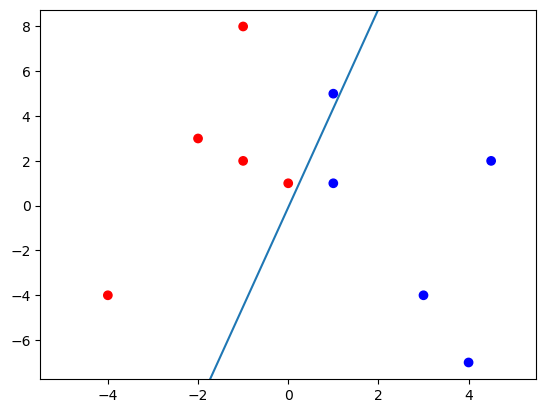

In [11]:
# In this example we set the initial weights to zero and the learning rate 
# relatively small. However, we only train for a few epochs which is not 
# enough to converge on an accurate classifier.
w_0 = 0
w = [0, 0]
learning_rate = 0.01
epochs = 11

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,
                              input_data, labels, 
                              learning_rate, epochs)
print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)

epoch 0 has total loss 6.223923692215003
epoch 10 has total loss 2.9287154378367712
epoch 20 has total loss 2.3584449039881488
epoch 30 has total loss 2.0636076120006903
epoch 40 has total loss 1.8696299804962355
epoch 50 has total loss 1.7267167165811537
epoch 60 has total loss 1.6144108218404705
epoch 70 has total loss 1.5224295144979199
epoch 80 has total loss 1.4448950765018669
epoch 90 has total loss 1.3781364940480267
epoch 100 has total loss 1.319708591557062

Final weights:
[1.7028723012501872, -0.09064040426016721] -0.1352352402813103
Our model predicted 10 out of 10 correctly for 100.0 % accuracy


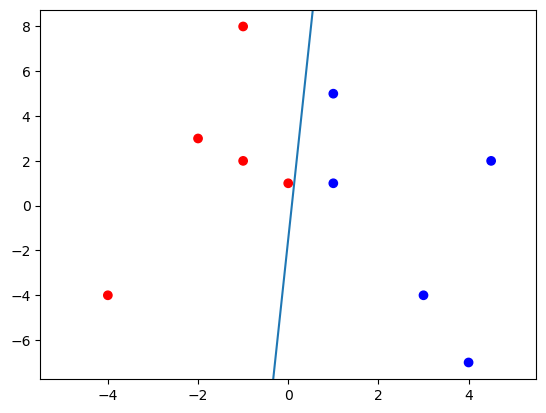

In [13]:
# It is a bad practice to start the NN with w and w_0  as 0
w_0 = 0.1
w = [0.1, 0.1]

# In practice, weights are typically initially randomnized
# w_0 = random.gauss(0, 1)
# w = [random.gauss(0, 1) for i in range(2)]

learning_rate = 0.01
epochs = 101

w, w_0 = train_model_NLL_loss(single_neuron_classification_model, w, w_0,\
                              input_data, labels, learning_rate, epochs)

print("\nFinal weights:")
print(w, w_0)
evaluate_classification_accuracy(single_neuron_classification_model, w, w_0, input_data, labels)
plot_dataset_2D(input_data, labels)
plot_decision_boundary_2D(w, w_0)